In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
poblacion_df = pd.read_csv('../data/processed/Penetración-poblacion-limpio.csv')
hogares_df = pd.read_csv('../data/processed/penetracion-hogares-limpio.csv')
Accesos_Por_Tecnologia = pd.read_csv('../data/processed/accesos_por_tecnologia_limpio.csv')
penetracion_total_df = pd.read_csv('../data/processed/Penetracion-totales.csv')

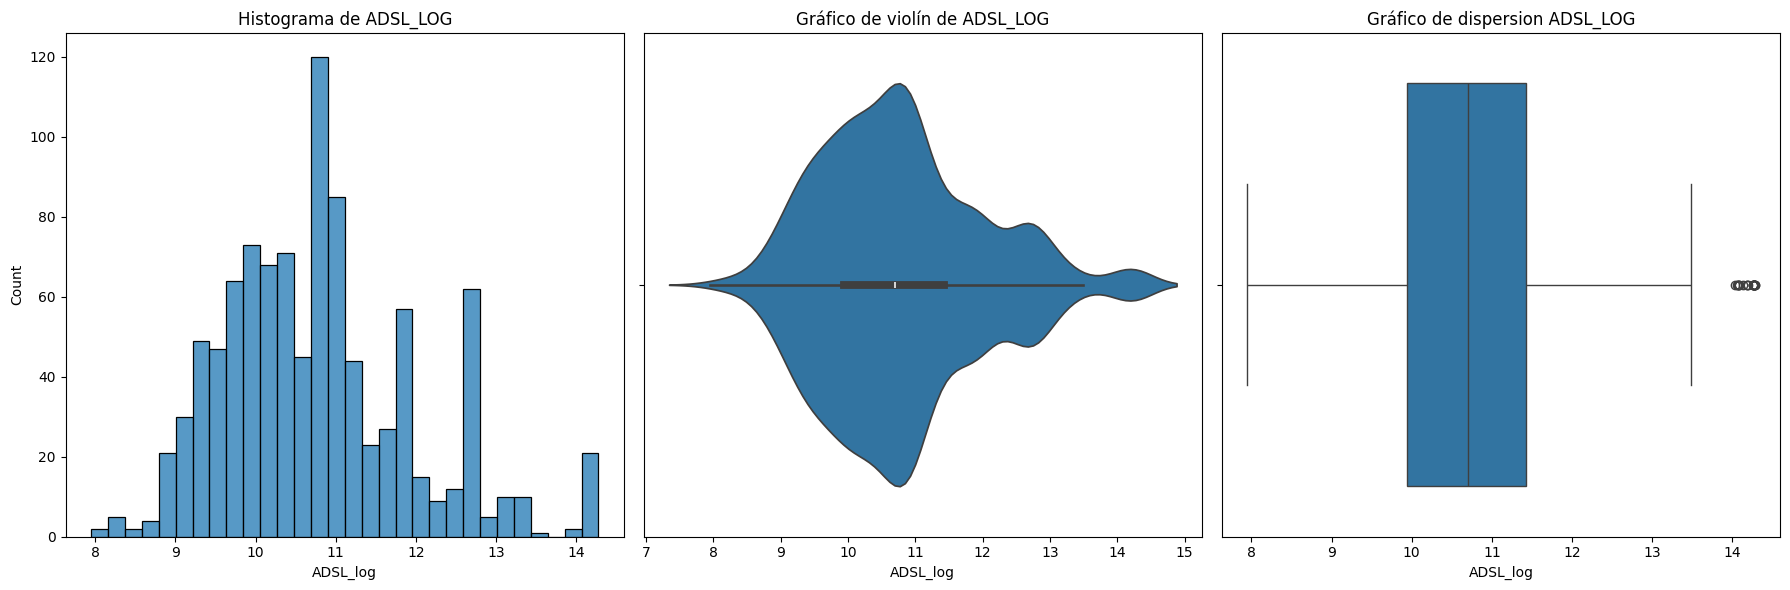

In [3]:
Accesos_Por_Tecnologia["ADSL_log"] = np.log(Accesos_Por_Tecnologia["ADSL"] + 1)  # +1 para evitar log(0)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histograma
sns.histplot(data=Accesos_Por_Tecnologia, x="ADSL_log", bins=30, ax=axes[0])
axes[0].set_title('Histograma de ADSL_LOG')

# Gráfico de violín
sns.violinplot(data=Accesos_Por_Tecnologia, x="ADSL_log", ax=axes[1])
axes[1].set_title('Gráfico de violín de ADSL_LOG')

#Gráfico de dispersion
sns.boxplot(data=Accesos_Por_Tecnologia, x="ADSL_log",ax=axes[2])
axes[2].set_title('Gráfico de dispersion ADSL_LOG')
# Mostrar los gráficos
plt.tight_layout()
plt.show()

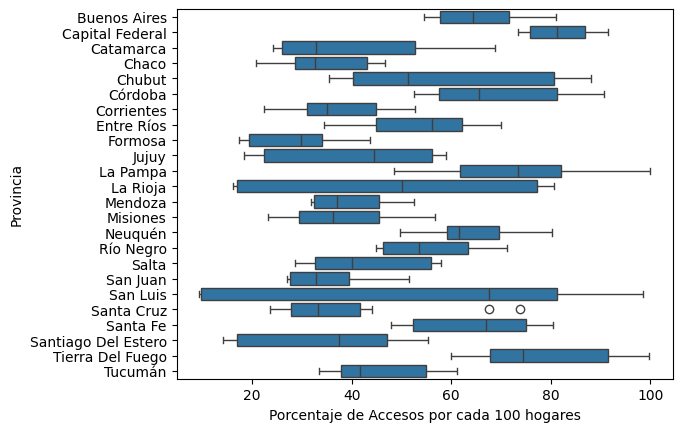

In [4]:
sns.boxplot(data=hogares_df, x="Accesos por cada 100 hogares", y="Provincia")
plt.xlabel("Porcentaje de Accesos por cada 100 hogares")
plt.show()

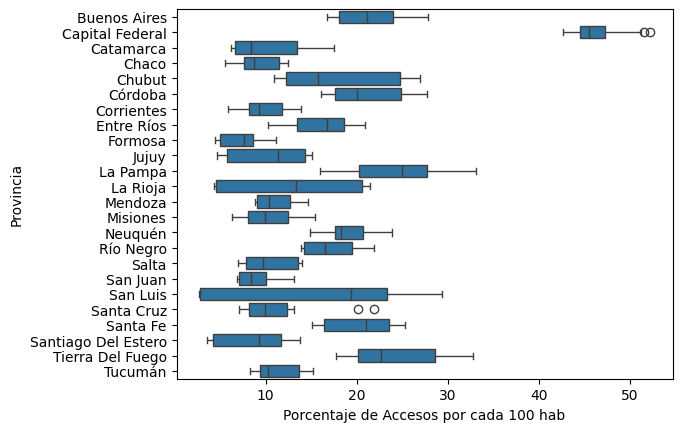

In [5]:
# Crear el diagrama de caja utilizando seaborn
sns.boxplot(data=poblacion_df, x="Accesos por cada 100 hab", y="Provincia")

# Etiqueta para el eje x
plt.xlabel("Porcentaje de Accesos por cada 100 hab")

# Mostrar el gráfico
plt.show()

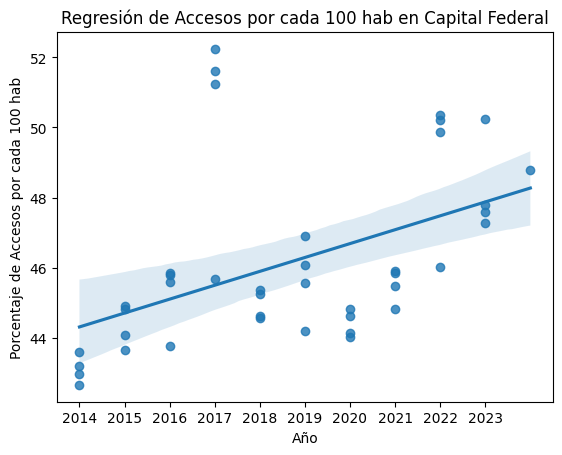

In [6]:
# Filtrar datos para la provincia de "Capital Federal"
capital_federal = poblacion_df[poblacion_df["Provincia"] == "Capital Federal"]

# Crear el gráfico de regresión utilizando seaborn
sns.regplot(x="Año", y="Accesos por cada 100 hab", data=capital_federal)

# Establecer el rango de los ticks en el eje x
plt.xticks(range(2014, 2024))

# Etiquetas para los ejes y título
plt.xlabel('Año')
plt.ylabel('Porcentaje de Accesos por cada 100 hab')
plt.title('Regresión de Accesos por cada 100 hab en Capital Federal')

# Mostrar el gráfico
plt.show()

In [7]:
df_Penetracion_totales_comparacion = penetracion_total_df[["Año","Trimestre","Accesos por cada 100 hab"]]

In [8]:
df_trimestre1 = df_Penetracion_totales_comparacion[df_Penetracion_totales_comparacion['Trimestre'] == 1]
df_trimestre2 = df_Penetracion_totales_comparacion[df_Penetracion_totales_comparacion['Trimestre'] == 2]
df_trimestre3 = df_Penetracion_totales_comparacion[df_Penetracion_totales_comparacion['Trimestre'] == 3]
df_trimestre4 = df_Penetracion_totales_comparacion[df_Penetracion_totales_comparacion['Trimestre'] == 4]

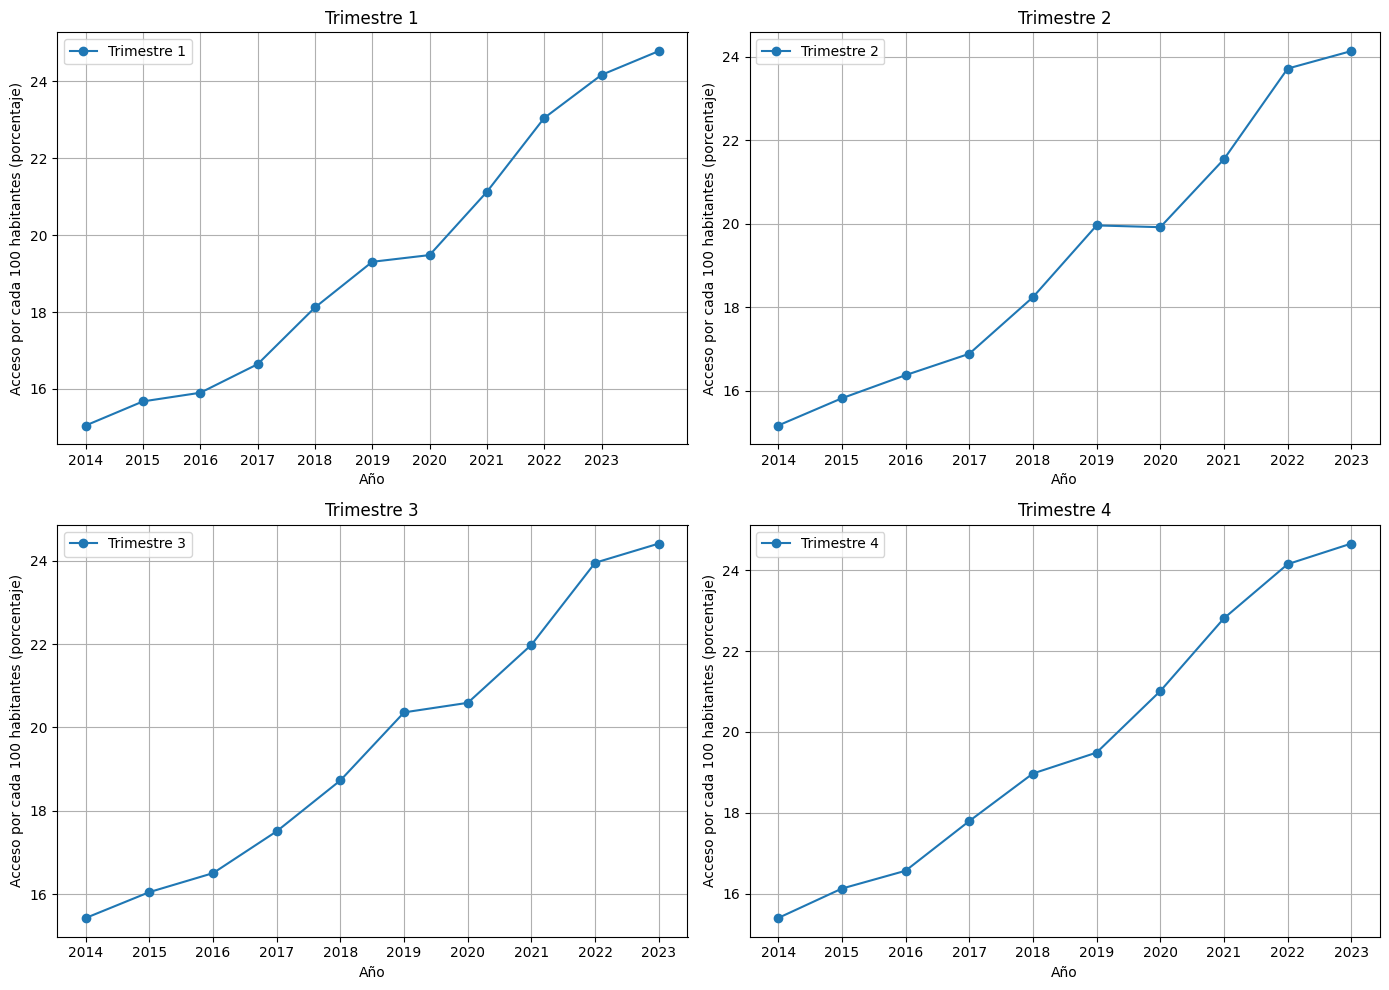

In [9]:
# Crear subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Trimestre 1 vs Trimestre 2
axs[0, 0].plot(df_trimestre1['Año'], df_trimestre1['Accesos por cada 100 hab'], marker='o', label='Trimestre 1')
axs[0, 0].set_title('Trimestre 1')
axs[0, 0].set_xlabel('Año')
axs[0, 0].set_ylabel('Acceso por cada 100 habitantes (porcentaje)')
axs[0, 0].set_xticks(range(2014, 2024))
axs[0, 0].legend()
axs[0, 0].grid(True)

# Trimestre 3 vs Trimestre 4
axs[0, 1].plot(df_trimestre2['Año'], df_trimestre2['Accesos por cada 100 hab'], marker='o', label='Trimestre 2')
axs[0, 1].set_title('Trimestre 2')
axs[0, 1].set_xlabel('Año')
axs[0, 1].set_ylabel('Acceso por cada 100 habitantes (porcentaje)')
axs[0, 1].set_xticks(range(2014, 2024))
axs[0, 1].legend()
axs[0, 1].grid(True)

# Trimestre 1 vs Trimestre 3
axs[1, 0].plot(df_trimestre3['Año'], df_trimestre3['Accesos por cada 100 hab'], marker='o', label='Trimestre 3')
axs[1, 0].set_title('Trimestre 3')
axs[1, 0].set_xlabel('Año')
axs[1, 0].set_ylabel('Acceso por cada 100 habitantes (porcentaje)')
axs[1, 0].set_xticks(range(2014, 2024))
axs[1, 0].legend()
axs[1, 0].grid(True)

# Trimestre 2 vs Trimestre 4
axs[1, 1].plot(df_trimestre4['Año'], df_trimestre4['Accesos por cada 100 hab'], marker='o', label='Trimestre 4')
axs[1, 1].set_title('Trimestre 4')
axs[1, 1].set_xlabel('Año')
axs[1, 1].set_ylabel('Acceso por cada 100 habitantes (porcentaje)')
axs[1, 1].set_xticks(range(2014, 2024))
axs[1, 1].legend()
axs[1, 1].grid(True)

# Ajustar el layout
plt.tight_layout()
plt.show()

In [10]:
# Calcular el promedio de accesos por cada 100 hogares por provincia
kpi_hogares_provincia = hogares_df.groupby('Provincia')['Accesos por cada 100 hogares'].mean().round(2)

# Calcular el promedio de accesos por cada 100 hogares a nivel nacional
kpi_hogares_nacional = hogares_df['Accesos por cada 100 hogares'].mean().round(2)

# Crear un DataFrame con los resultados
resultados_df = pd.DataFrame({
    'Provincia': kpi_hogares_provincia.index,
    'Promedio de Accesos por cada 100 hogares': kpi_hogares_provincia.values
})

# Añadir una fila adicional para el promedio nacional
resultados_df.loc[len(resultados_df)] = ['Nacional', kpi_hogares_nacional]

# Guardar el DataFrame en un archivo CSV
resultados_df.to_csv('../data/processed/promedio_accesos_hogares.csv', index=False)

# Leer el CSV y mostrar los resultados para verificar
resultados_leidos = pd.read_csv('../data/processed/promedio_accesos_hogares.csv')
print(resultados_leidos)

              Provincia  Promedio de Accesos por cada 100 hogares
0          Buenos Aires                                     65.97
1       Capital Federal                                     81.62
2             Catamarca                                     40.54
3                 Chaco                                     34.76
4                Chubut                                     56.94
5            Corrientes                                     37.64
6               Córdoba                                     69.80
7            Entre Ríos                                     53.15
8               Formosa                                     28.09
9                 Jujuy                                     38.59
10             La Pampa                                     73.85
11             La Rioja                                     47.14
12              Mendoza                                     39.07
13             Misiones                                     37.95
14        

In [11]:
# Calcular el promedio de accesos por cada 100 hogares por provincia
kpi_poblacion_provincia = poblacion_df.groupby('Provincia')['Accesos por cada 100 hab'].mean().round(2)

# Calcular el promedio de accesos por cada 100 poblacion a nivel nacional
kpi_poblacion_nacional = poblacion_df['Accesos por cada 100 hab'].mean().round(2)

# Crear un DataFrame con los resultados
resultados_df = pd.DataFrame({
    'Provincia': kpi_poblacion_provincia.index,
    'Promedio de Accesos por cada 100 hab': kpi_poblacion_provincia.values
})

# Añadir una fila adicional para el promedio nacional
resultados_df.loc[len(resultados_df)] = ['Nacional', kpi_hogares_nacional]

# Guardar el DataFrame en un archivo CSV
resultados_df.to_csv('../data/processed/promedio_accesos_poblacion.csv', index=False)

# Leer el CSV y mostrar los resultados para verificar
resultados_leidos = pd.read_csv('../data/processed/promedio_accesos_poblacion.csv')
print(resultados_leidos)


              Provincia  Promedio de Accesos por cada 100 hab
0          Buenos Aires                                 21.45
1       Capital Federal                                 46.15
2             Catamarca                                 10.31
3                 Chaco                                  9.29
4                Chubut                                 17.45
5            Corrientes                                  9.91
6               Córdoba                                 21.36
7            Entre Ríos                                 15.89
8               Formosa                                  7.15
9                 Jujuy                                  9.87
10             La Pampa                                 24.59
11             La Rioja                                 12.55
12              Mendoza                                 10.90
13             Misiones                                 10.33
14              Neuquén                                 19.18
15      